In [12]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import joblib

In [2]:
# Load and prepare data
data = pd.read_csv('data/Advertising.csv', index_col=0)
# Advertisements in 1000$
features = ['TV', 'Radio', 'Newspaper']
# Sales Revenue in M$
target = 'Sales'
X = data[features]
y = data[target]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


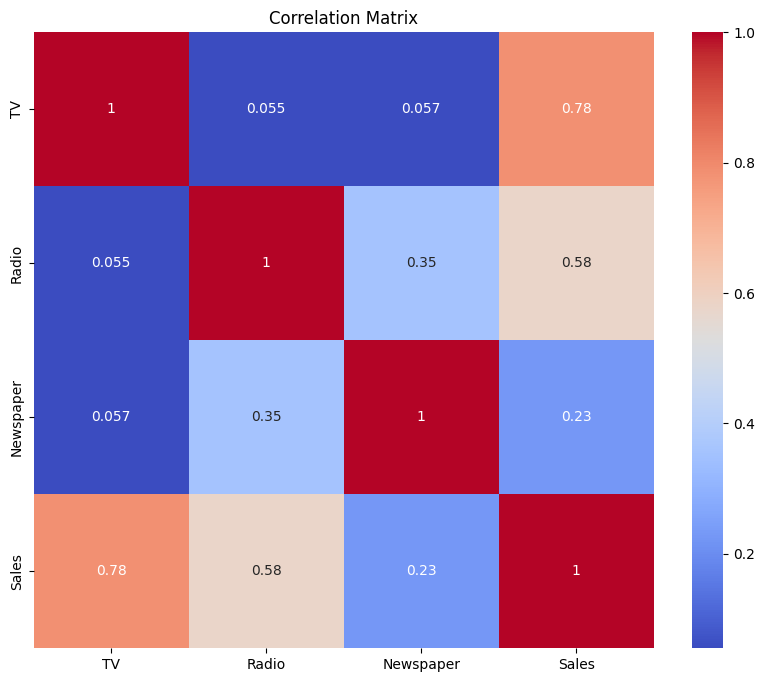

In [4]:
# Exploratory Data Analysis
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [5]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')



Mean Squared Error (MSE): 3.1740973539761073
Root Mean Squared Error (RMSE): 1.781599661533451
R-squared (R2): 0.8994380241009119


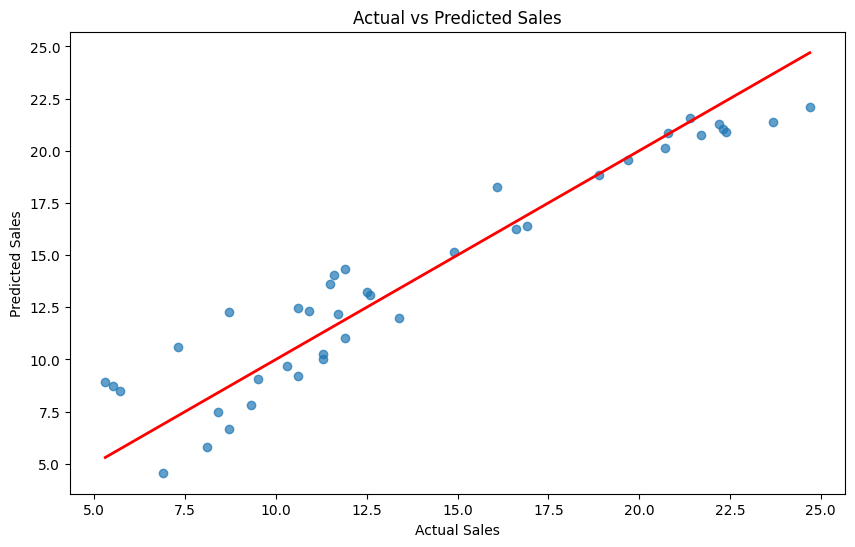

           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


In [6]:
# Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

# Print the model coefficients
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)

In [7]:
joblib.dump(model, 'sales_predictor.pkl')

['sales_predictor.pkl']